In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("../data/data.csv")
df.head()

,Province/State,City/County/Borough/Region,Date,Total Death,Total Confirmed,Death Rate
0,Alabama,Choctaw,2022-08-20,37,2155,0.017169
1,Alabama,Perry,2022-08-20,47,2366,0.019865
2,Alabama,Wilcox,2022-08-19,48,3299,0.014550
3,Alabama,Greene,2022-08-19,51,2079,0.024531
4,Alabama,Sumter,2022-08-20,52,2882,0.018043


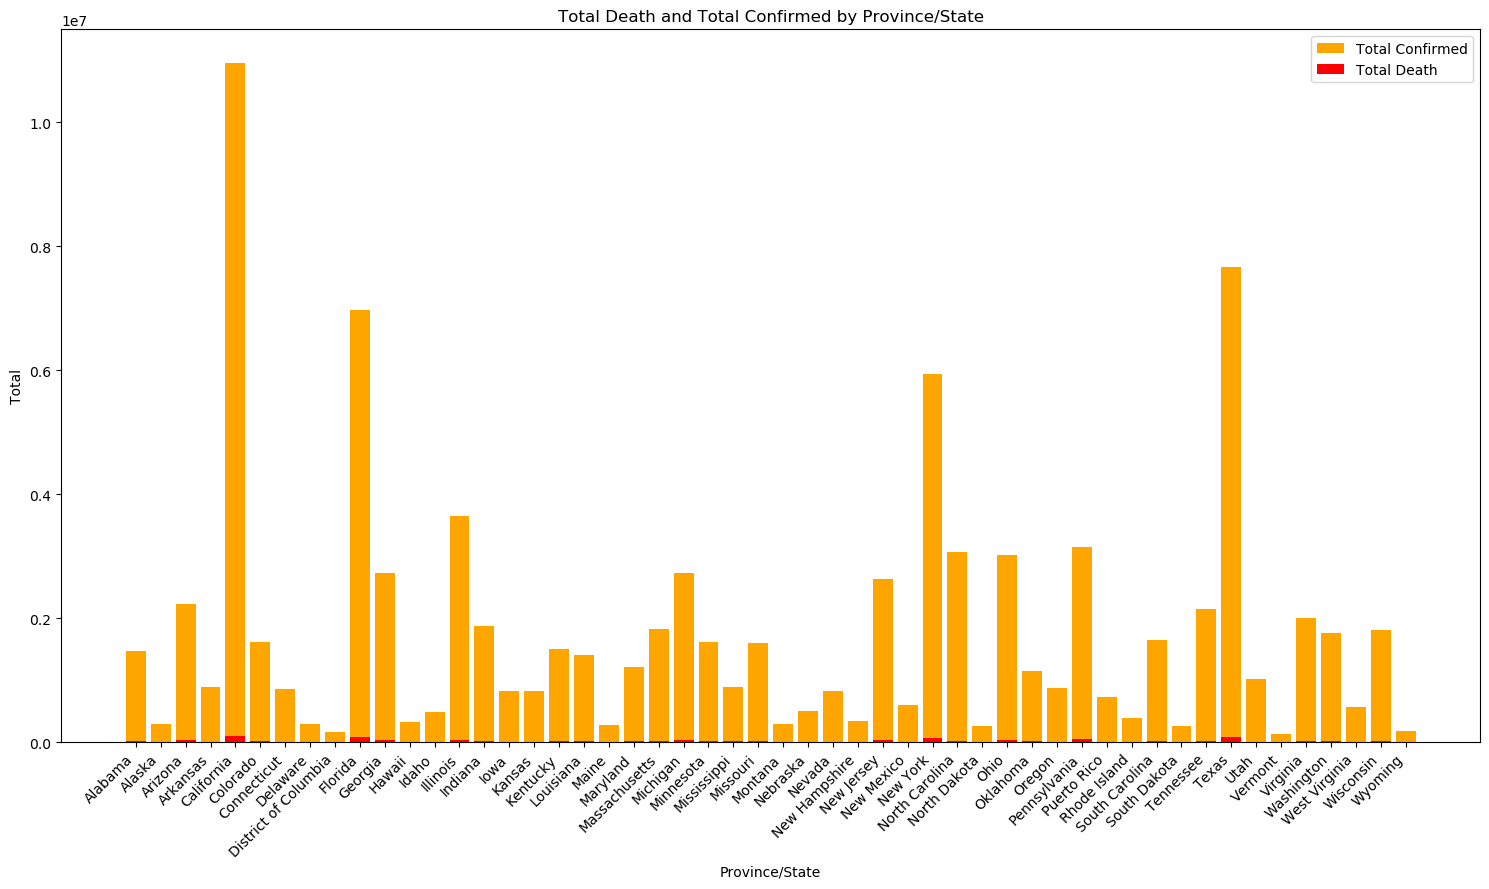

In [47]:
state_df = (
    df.groupby("Province/State")[["Total Death", "Total Confirmed"]].sum().reset_index()
)

plt.figure(figsize=(15, 9))

plt.bar(
    state_df["Province/State"],
    state_df["Total Confirmed"],
    color="orange",
    label="Total Confirmed",
)
plt.bar(
    state_df["Province/State"],
    state_df["Total Death"],
    color="red",
    label="Total Death",
)

plt.xlabel("Province/State")
plt.ylabel("Total")
plt.title("Total Death and Total Confirmed by Province/State")

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

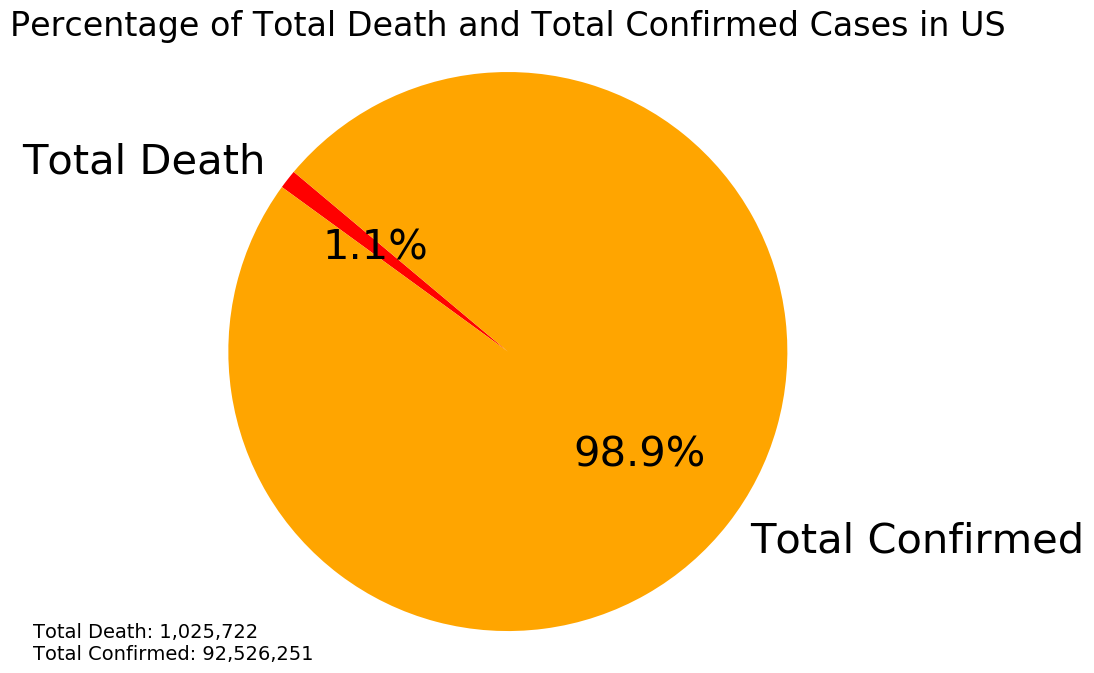

In [48]:
total_deaths = state_df["Total Death"].sum()
total_confirmed = state_df["Total Confirmed"].sum()

formatted_total_deaths = "{:,}".format(total_deaths)
formatted_total_confirmed = "{:,}".format(total_confirmed)

labels = ["Total Death", "Total Confirmed"]
sizes = [total_deaths, total_confirmed]
colors = ["red", "orange"]

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=lambda x: "{:.1f}%".format(x),
    startangle=140,
    textprops={"fontsize": 30},
)

title_text = f"Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}"
plt.title("Percentage of Total Death and Total Confirmed Cases in US", fontsize=24)

total_text = f"Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}"
plt.text(-1.7, -1.1, total_text, fontsize=14)

plt.axis("equal")
plt.show()